In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
DATA_PATH = "/content/Housing.csv"
df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Shape: (545, 13)
Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.head()
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [5]:
X = df.drop("price", axis=1)
y = df["price"]

print("y dtype:", y.dtype)
print("Unique y values:", y.nunique())   # should be many unique values (continuous-like)


y dtype: int64
Unique y values: 219


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train rows:", X_train.shape[0])
print("Test rows :", X_test.shape[0])


Train rows: 436
Test rows : 109


In [7]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[("scaler", StandardScaler())]), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)
print("✅ Model trained!")


✅ Model trained!


In [8]:
y_pred = model.predict(X_test)

comparison = pd.DataFrame({
    "Actual_Price": y_test.values[:10],
    "Predicted_Price": np.round(y_pred[:10], 0).astype(int)
})

comparison


,Actual_Price,Predicted_Price
0,4060000,5164654
1,6650000,7224722
2,3710000,3109863
3,6440000,4612075
4,2800000,3294646
5,4900000,3532275
6,5250000,5611775
7,4543000,6368146
8,2450000,2722857
9,3353000,2629406


In [9]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE : 970043.40
RMSE: 1324506.96


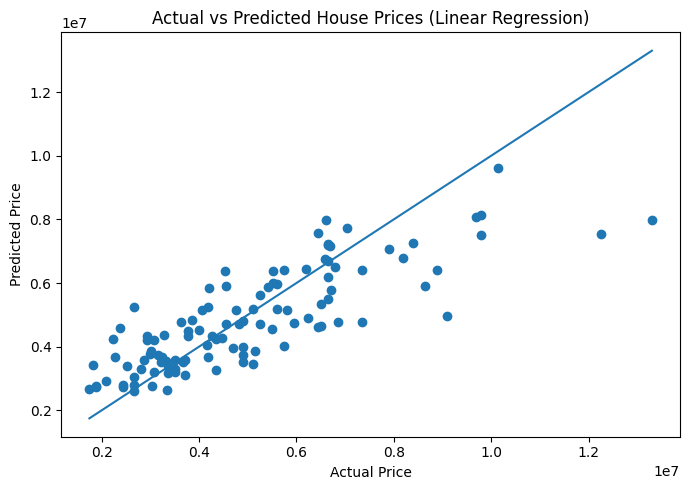

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices (Linear Regression)")

# reference line (perfect prediction line)
min_v = min(y_test.min(), y_pred.min())
max_v = max(y_test.max(), y_pred.max())
plt.plot([min_v, max_v], [min_v, max_v])

plt.tight_layout()
plt.show()


✅ Saved: predicted_vs_actual.png


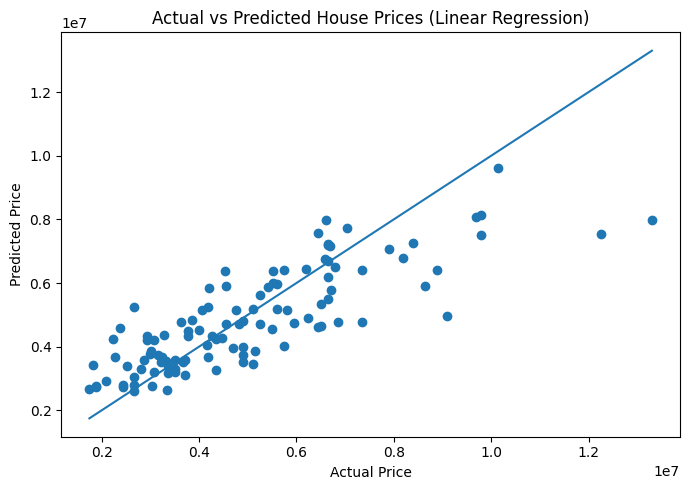

In [11]:
plot_path = "predicted_vs_actual.png"
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices (Linear Regression)")
min_v = min(y_test.min(), y_pred.min())
max_v = max(y_test.max(), y_pred.max())
plt.plot([min_v, max_v], [min_v, max_v])
plt.tight_layout()
plt.savefig(plot_path, dpi=150)
print("✅ Saved:", plot_path)


In [12]:
pre = model.named_steps["preprocess"]
reg = model.named_steps["regressor"]

# feature names after preprocessing
cat_encoder = pre.named_transformers_["cat"]
cat_features = cat_encoder.get_feature_names_out(cat_cols).tolist()
feature_names = num_cols + cat_features

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": reg.coef_
})
coef_df["abs_coeff"] = coef_df["coefficient"].abs()

top_features = coef_df.sort_values("abs_coeff", ascending=False).drop(columns="abs_coeff")
top_features.head(10)


,feature,coefficient
2,bathrooms,521879.027748
0,area,519552.416340
14,airconditioning_yes,395713.367922
13,airconditioning_no,-395713.367922
3,stories,349251.438906
11,hotwaterheating_no,-342324.942669
12,hotwaterheating_yes,342324.942669
16,prefarea_yes,314945.282657
15,prefarea_no,-314945.282657
19,furnishingstatus_unfurnished,-233469.435624


In [13]:
report_path = "mae_rmse_report.txt"

with open(report_path, "w") as f:
    f.write("House Price Prediction (Linear Regression)\n")
    f.write("=========================================\n\n")
    f.write(f"MAE : {mae:.2f}\n")
    f.write(f"RMSE: {rmse:.2f}\n\n")
    f.write("Top 10 features by absolute coefficient:\n")
    f.write(top_features.head(10).to_string(index=False))

print("✅ Saved:", report_path)


✅ Saved: mae_rmse_report.txt


In [14]:
from google.colab import files
files.download("mae_rmse_report.txt")
files.download("predicted_vs_actual.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>